In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
ath = pd.read_csv("athlete_events.csv")
reg = pd.read_csv("noc_regions.csv")

In [4]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
reg.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
#joining dataframes

In [7]:
df = ath.merge(reg, how = 'left', on = "NOC")

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
df = df.rename(columns = {'region': 'Region', 'notes':'Notes'})

In [10]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
#Shape

In [12]:
df.shape

(271116, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [14]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [15]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


First olympics was held in 1896

Youngest participent was aged 10 years and oldest was 97


 # EDA

In [16]:
#Top 10 countries from overal lparticipation in history of olympics

In [17]:
top_10 = df.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation of Countries from 1896'}, ylabel='Team'>

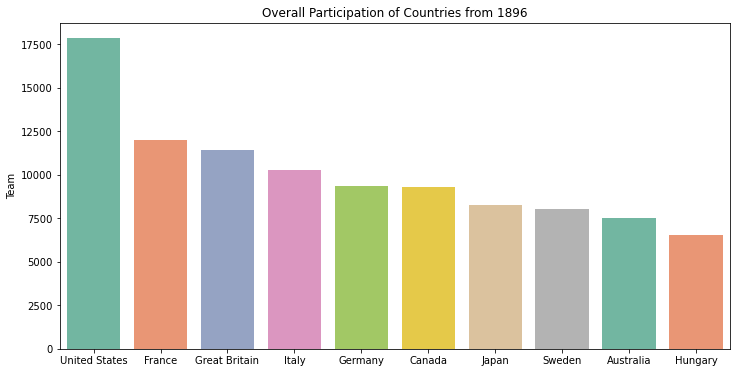

In [18]:
plt.figure(figsize=(12,6))
plt.title("Overall Participation of Countries from 1896")
sns.barplot(x=top_10.index, y=top_10, palette='Set2')

In [19]:
#Age Distribution

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

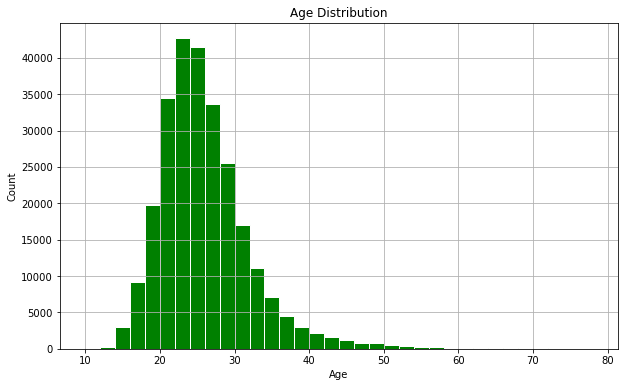

In [20]:
plt.figure(figsize=(10,6))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel('Count')
df['Age'].hist(bins= np.arange(10,80,2), color='green', edgecolor='white' )

In [21]:
#Winter olympics

In [22]:
wint = df[df.Season == 'Winter'].Sport.unique()
wint

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [23]:
summer = df[df.Season == 'Summer'].Sport.unique()
summer

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [24]:
print("Number of sports that are unique to winter olympics only = ",len(wint))

Number of sports that are unique to winter olympics only =  17


In [25]:
#Gender participation

In [26]:
gender = df.Sex.value_counts()
gender

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff136df0ac0>,
 [Text(0.7147310163003329, -0.8361576252945934, 'M'),
  Text(-0.7147309380136028, 0.836157692212537, 'F')],
 [Text(0.38985328161836336, -0.4560859774334145, '72.5%'),
  Text(-0.3898532389165105, 0.456086013934111, '27.5%')])

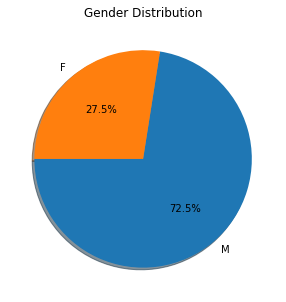

In [27]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution")
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', shadow=True, startangle=180)

In [28]:
#Women participation

In [29]:
women = df[(df.Sex == 'F') & (df.Season == 'Summer')]

<AxesSubplot:title={'center':'Women Participation in summer olympics'}, xlabel='Year', ylabel='count'>

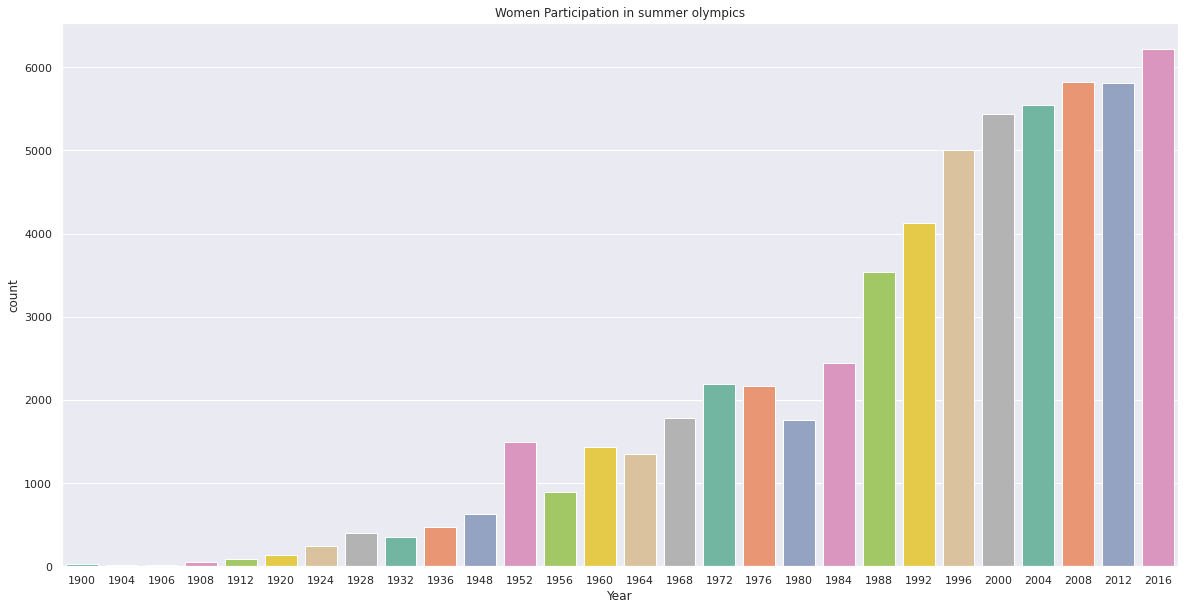

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
plt.title("Women Participation in summer olympics")
sns.countplot(x='Year',data=women, palette="Set2")

<AxesSubplot:title={'center':'Women Participation in summer olympics'}, xlabel='Year'>

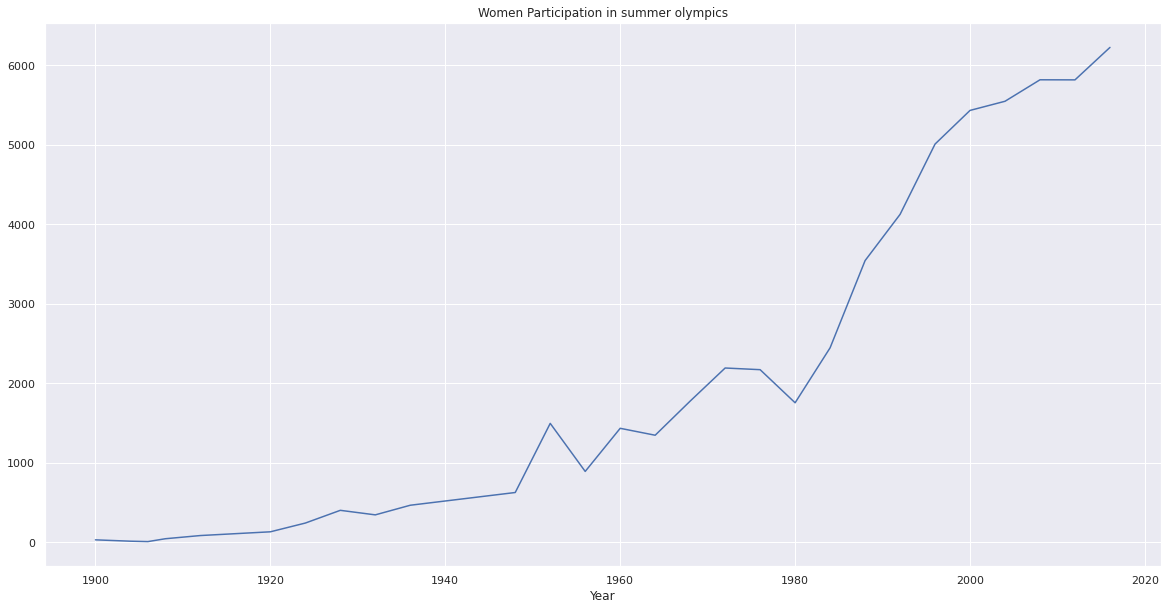

In [31]:
part = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
plt.title("Women Participation in summer olympics")
part.loc[:,'F'].plot()

<AxesSubplot:title={'center':'Women Participation in Winter olympics'}, xlabel='Year', ylabel='count'>

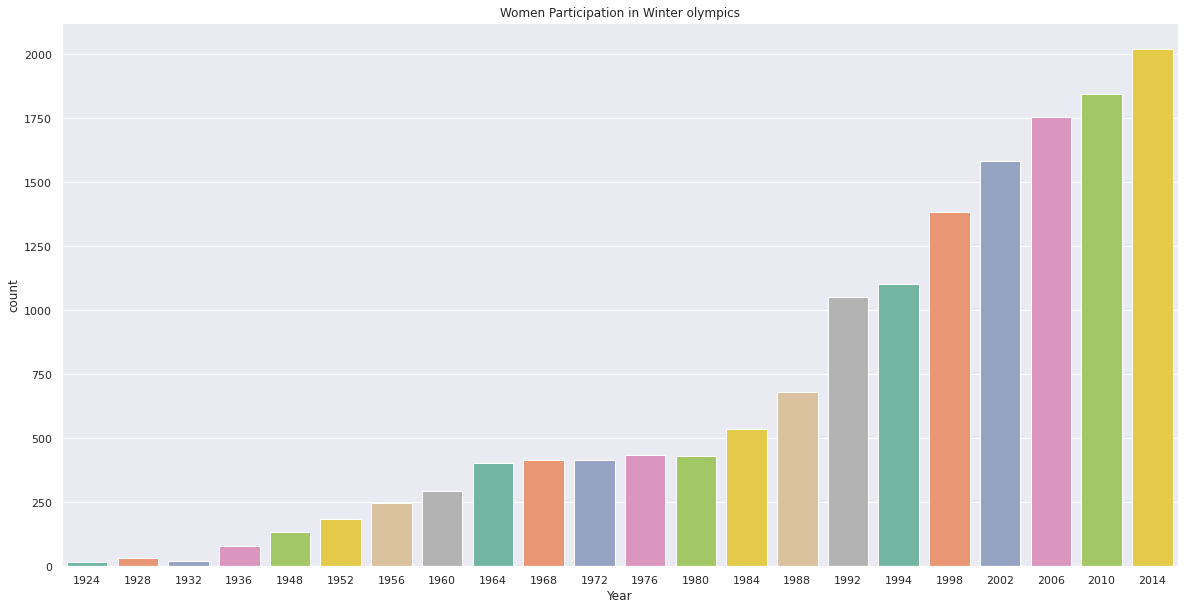

In [32]:
women_wint = df[(df.Sex == 'F') & (df.Season == 'Winter')]
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
plt.title("Women Participation in Winter olympics")
sns.countplot(x='Year',data=women_wint, palette="Set2")

<AxesSubplot:title={'center':'Women Participation in winter olympics'}, xlabel='Year'>

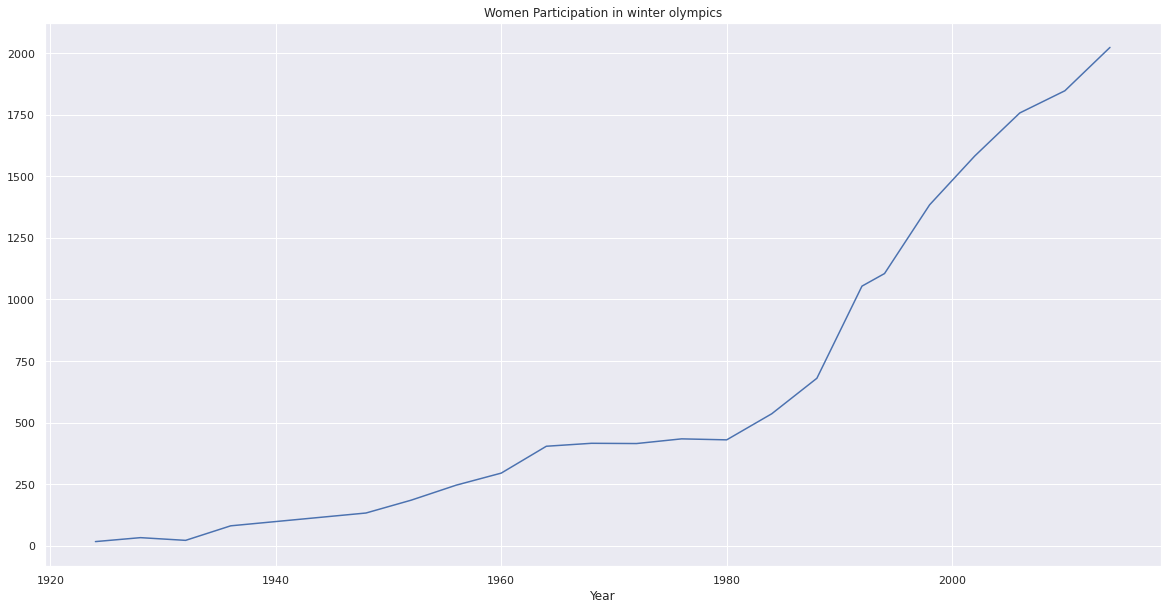

In [33]:
part = women_wint.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
plt.title("Women Participation in winter olympics")
part.loc[:,'F'].plot()

In [34]:
#Gold medals

In [35]:
gold = df[df.Medal == 'Gold']
gold = gold[np.isfinite(gold['Age'])]

In [36]:
#Gold beyong Age 60

In [37]:
gold['ID'][gold['Age'] > 60].count()

6

In [38]:
#sporting events of gold medalists beyong age 60

In [39]:
event = gold['Sport'][gold['Age'] > 60]
event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/home/arjun/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'sporting events of gold medalists beyong age 60'}, xlabel='Sport', ylabel='count'>

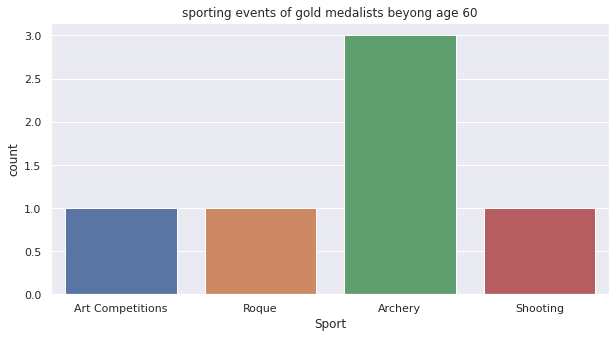

In [40]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.title("sporting events of gold medalists beyong age 60")
sns.countplot(event)

In [41]:
#Gold medals from each country

Text(0.5, 1.0, 'Top 10 Countries')

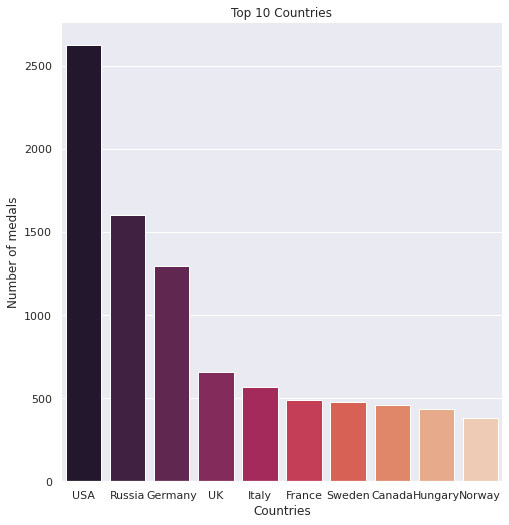

In [42]:
total = gold.Region.value_counts().reset_index(name='Medals').head(10)
g = sns.catplot(x = 'index', y = 'Medals', data = total, kind = 'bar', palette = 'rocket', height=7)
g.despine(left=True)
g.set_xlabels("Countries")
g.set_ylabels("Number of medals")
plt.title("Top 10 Countries")

In [43]:
#India in Olympics

In [44]:
ind = df[df['Team'] == 'India']
ind = ind[np.isfinite(ind['Age'])]

In [45]:
ind = ind[ind['Medal'].notna()]

In [46]:
ind.Sport.value_counts()

Hockey           161
Wrestling          5
Shooting           4
Athletics          2
Boxing             2
Badminton          2
Tennis             1
Weightlifting      1
Name: Sport, dtype: int64

In [47]:
gld = ind[ind['Medal'] == 'Gold']

In [48]:
gld.Sport.value_counts()

Hockey      118
Shooting      1
Name: Sport, dtype: int64